## Reddit BERT Base Posts Sentiment Analysis
Gulliver Wutz

In [9]:
import pandas as pd
import numpy as np
import torch
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

tqdm.pandas()
pd.set_option('display.max_colwidth', 20)

PyTorch Configuration:

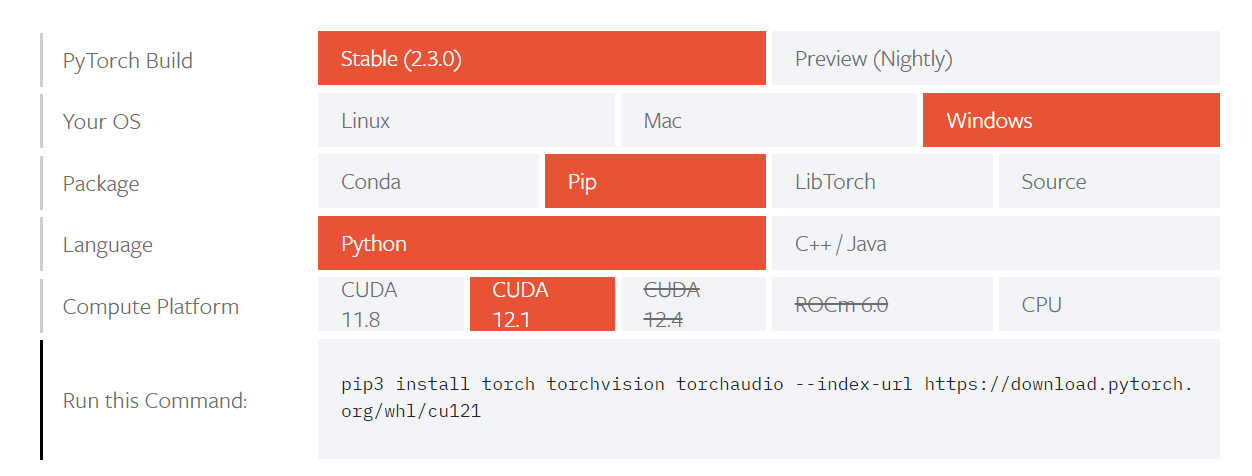

BERT Model: https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

In [62]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def get_sentiment(text):
    while True:
        try:
            tokens = tokenizer.encode(str(text), return_tensors='pt')
            result = model(tokens)
            break
        except Exception as e:
            if len(text) > 20:
                text = text[:-10]
            else:
                return -1
    return int(torch.argmax(result.logits))

### Reddit-Posts Sentiment Analysis

In [8]:
# Load Posts
reddit_posts = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_posts_trimmed.csv')
reddit_posts['Created CEST'] = pd.to_datetime(reddit_posts['Created CEST'])

In [9]:
# Add Title Sentiment Scores from 0(Worst) - 4(Best)
reddit_posts['BERT-BASE Title Sentiment'] = reddit_posts['Title'].progress_apply(get_sentiment)
reddit_posts.to_csv('reddit_posts_sentiment.csv', index=False)

100%|██████████| 54129/54129 [56:26<00:00, 15.98it/s]    


In [11]:
# Add Content Sentiment Scores from 0(Worst) - 4(Best)
reddit_posts['BERT-BASE Content Sentiment'] = reddit_posts.progress_apply(lambda row: get_sentiment(row['Content']) if row['Is Self-post'] == 1 else -1, axis=1)
reddit_posts.to_csv('reddit_posts_sentiment.csv', index=False)

100%|██████████| 54129/54129 [1:34:46<00:00,  9.52it/s]  


### Posts Dataset Inspection

In [7]:
posts_df = pd.read_csv('reddit_posts_sentiment.csv')
print("Dataset size: " + str(posts_df.shape))
print("\n")

if posts_df['ID'].is_unique:
    print("IDs are unique!")
else:
    print("IDs NOT are unique!")

if posts_df['Full ID'].is_unique:
    print("Full IDs are unique!")
else:
    print("Full IDs are NOT unique!")

if posts_df.isna().any().any():
    print(str(posts_df.isna().sum().sum()) + " NaN-Values detected!")
else:
    print("No NaN-Values detected!")

Dataset size: (54129, 16)


IDs are unique!
Full IDs are unique!
17810 NaN-Values detected!


In [10]:
posts_df

,Subreddit,Title,ID,Full ID,Author,URL,Is Self-post,Score,Comment Count,Created CEST,Collected CEST,Updated CEST,Content,Patch,BERT-BASE Title Sentiment,BERT-BASE Content Sentiment
0,SeraphineMains,"New Item on PBE,...",1ch5547,t3_1ch5547,MrZelf,https://i.redd.i...,False,104,38,2024-04-30 23:59:19,2024-05-26 12:45:50,2024-05-26 12:45:50,NaN,14.8,4,-1
1,sylasmains,"Yeess, Yess, YEE...",1ch54nu,t3_1ch54nu,AssasSylas_Creed,https://i.redd.i...,False,80,16,2024-04-30 23:58:48,2024-05-26 12:52:40,2024-05-26 12:52:40,NaN,14.8,0,-1
2,GarenMains,New Item for Gar...,1ch527f,t3_1ch527f,JJBez,https://x.com/sp...,False,2,12,2024-04-30 23:56:00,2024-05-26 12:05:46,2024-05-26 12:05:46,Maybe a replacem...,14.8,2,-1
3,GarenMains,I genuinely hate...,1ch51zd,t3_1ch51zd,JustSpawned20,https://www.redd...,True,0,17,2024-04-30 23:55:45,2024-05-26 12:05:46,2024-05-26 12:05:46,I think it's the...,14.8,0,0
4,PantheonMains,A bunch of ideas...,1ch51ry,t3_1ch51ry,SuperChemes,https://www.redd...,True,3,0,2024-04-30 23:55:31,2024-05-26 12:33:59,2024-05-26 12:33:59,"First, English i...",14.8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54124,ezrealmains,WHAT THE FUCK IS...,192spbu,t3_192spbu,SeventhSkyV,https://i.redd.i...,False,39,17,2024-01-10 00:09:09,2024-04-17 14:30:22,2024-05-26 12:02:43,I'm buying the s...,14.1,0,-1
54125,shacomains,The Otter Jester...,192sn0e,t3_192sn0e,EvilMartin12,https://i.redd.i...,False,15,1,2024-01-10 00:06:26,2024-04-17 15:15:17,2024-05-26 12:47:14,NaN,14.1,4,-1
54126,yuumimains,Yuumi Mid game,192sl1p,t3_192sl1p,Charming-Milk-336,https://i.redd.i...,False,25,14,2024-01-10 00:04:15,2024-04-17 15:43:52,2024-05-26 13:14:39,Sooo I thought i...,14.1,2,-1
54127,LeaguePBE,PBE Bug & Feedba...,192skjk,t3_192skjk,LoL-Dev-PBE,https://www.redd...,True,0,33,2024-01-10 00:03:39,2024-04-17 14:20:31,2024-05-26 10:03:56,**Post-PBE Updat...,14.1,0,4


### Reddit-Comments Sentiment Analysis

In [47]:
# Start from scratch
reddit_comments = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_comments.csv')
reddit_comments_chunks = [reddit_comments.iloc[i:i + 500] for i in range(0, len(reddit_comments), 500)]
temp_df = pd.DataFrame(columns=reddit_comments.columns)
temp_df['BERT-BASE Comment Sentiment'] = []

329088

In [66]:
# Start from checkpoint
reddit_comments = pd.read_csv('C:/Users/wutzg/Desktop/Master Thesis/Artifacts/Datasets/reddit_comments.csv')

comments_sentiment_df = pd.read_csv('reddit_comments_sentiment.csv')
comment_ids = comments_sentiment_df['Comment ID'].unique()
reddit_comments = reddit_comments[~reddit_comments['Comment ID'].isin(comment_ids)]

reddit_comments_chunks = [reddit_comments.iloc[i:i + 500] for i in range(0, len(reddit_comments), 500)]
temp_df = comments_sentiment_df

In [ ]:
# Add Comment Sentiment Scores from 0(Worst) - 4(Best)
for chunk in tqdm(reddit_comments_chunks):
    #chunk['BERT-BASE Comment Sentiment'] = chunk['Content'].apply(get_sentiment)
    chunk.loc[:, 'BERT-BASE Comment Sentiment'] = chunk['Content'].apply(get_sentiment)
    temp_df = pd.concat([temp_df, chunk], ignore_index=True)
    temp_df.to_csv('reddit_comments_sentiment.csv', index=False)

### Comment Dataset Inspection

In [77]:
comments_df = pd.read_csv('reddit_comments_sentiment.csv')
print("Dataset size: " + str(comments_df.shape))
print("\n")

if comments_df['Comment ID'].is_unique:
    print("Comment IDs are unique!")
else:
    print("Comment IDs NOT are unique!")

if comments_df['Parent ID'].is_unique:
    print("Parent IDs are unique!")
else:
    print("Parent IDs are NOT unique!")

if comments_df.isna().any().any():
    print(str(comments_df.isna().sum().sum()) + " NaN-Values detected!")
else:
    print("No NaN-Values detected!")

Dataset size: (329088, 8)


Comment IDs are unique!
Parent IDs are NOT unique!
6638 NaN-Values detected!


In [76]:
comments_df

,Parent ID,Comment ID,Author,Score,Created CEST,Collected CEST,Content,BERT-BASE Comment Sentiment
0,1ch5547,l20835j,Responsible-Jury8618,77,2024-05-01 00:07:40,2024-05-27 13:25:36,"Ok, this is HUGE, all of Seraphine's dmg is AO...",4.0
1,1ch5547,l2087qq,London_Tipton,29,2024-05-01 00:08:28,2024-05-27 13:25:36,Definitely core for carry Seraphine. It's basi...,3.0
2,1ch5547,l20730g,PromotionOdd8700,19,2024-05-01 00:01:29,2024-05-27 13:25:36,This item + liandrys looks like new core items??,0.0
3,1ch5547,l2098yb,Alive-Pop6243,15,2024-05-01 00:14:52,2024-05-27 13:25:36,Seraphine gonna love this plus Morgan’s jungl...,4.0
4,1ch5547,l21dqtk,sum-dude,9,2024-05-01 04:36:25,2024-05-27 13:25:36,Now just give us back our 5 AD and we're good.,4.0
...,...,...,...,...,...,...,...,...
329083,192skjk,kjbpdj5,Amy_Sery,1,2024-01-24 09:31:32,2024-05-28 11:06:02,#Heya everyone! The new testing cycle will beg...,0.0
329084,192sicz,kh4rsn5,TannerCook100,3,2024-01-10 01:00:30,2024-05-28 11:06:06,What you’re supposed to do changes depending o...,3.0
329085,192sicz,kh4sq1d,xdlol11,2,2024-01-10 01:06:19,2024-05-28 11:06:06,"We can't see the game, but in general there's ...",2.0
329086,192sicz,kh7eocl,RusticApothecary,1,2024-01-10 14:48:00,2024-05-28 11:06:06,"Flame them, spam FF and do a lot worse to show...",0.0
